Formação Cientista de Dados - Sessão 22  
Regressão Linear Simples

In [2]:
# Importação das bibliotecas, sklearn para criar o modelo de regressão e yellowbrick para visualização de residuais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Warning
from yellowbrick.regressor import ResidualsPlot

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
# Carregamento da base de dados e exclusão da primeira coluna
base = pd.read_csv('cars.csv')
base.shape

(50, 3)

In [4]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [5]:
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [6]:
# Definição das variáveis x e y, sendo x a distância (variável independente) e Y a velocidade (variável dependente)
x = base.iloc[:, 1].values
y = base.iloc[:, 0].values
x

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85], dtype=int64)

In [7]:
# Cálculo da correlação entre x e y
correlacao = np.corrcoef(x, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [10]:
# Formato de matriz com uma coluna a mais
x = x.reshape(-1, 1)
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [11]:
# Visualização dos coeficientes
# Interceptação
modelo.intercept_

8.283905641787172

In [12]:
# Inclinação
modelo.coef_

array([0.16556757])

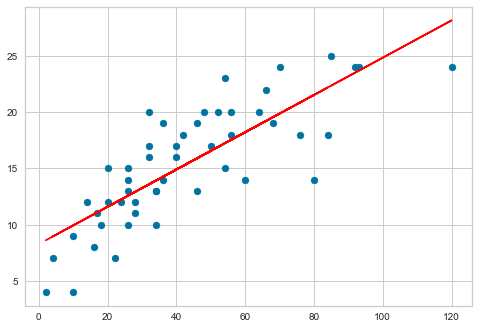

In [13]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = 'red')

In [14]:
# Previsão da "distância 22 pés" usando a fórmula manual
# interceptação + inclinação * valor de dist
# Qual velocidade se levou 22 pés para parar?
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [15]:
# Previsão utilizando função do sklearn
modelo.predict([[22]])

array([11.92639228])

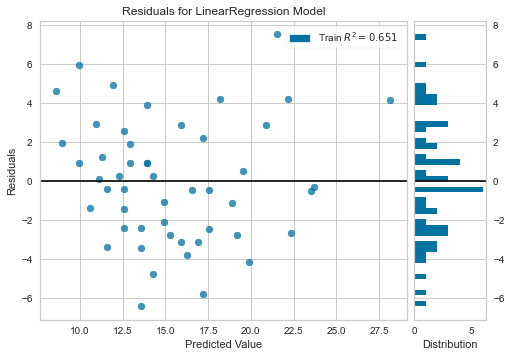

In [16]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()